In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
bank=pd.read_csv("/content/bank.csv",sep=';')

In [3]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Q1. Perform EDA on the given data. What does the primary analysis of several categorical features reveal? 🡪5 marks

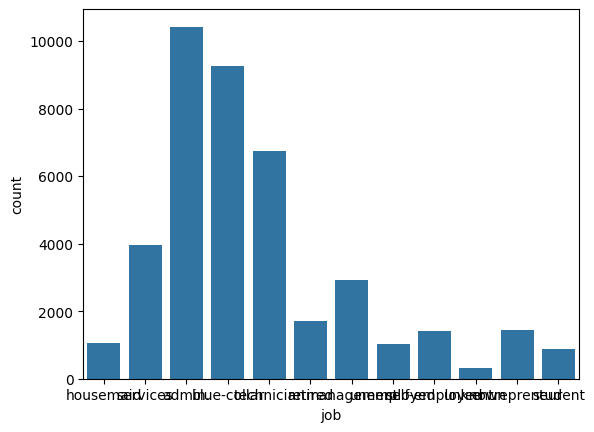

<Figure size 1500x1000 with 0 Axes>

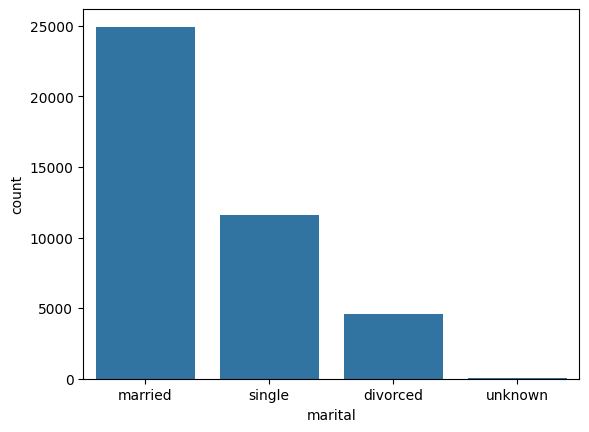

<Figure size 1500x1000 with 0 Axes>

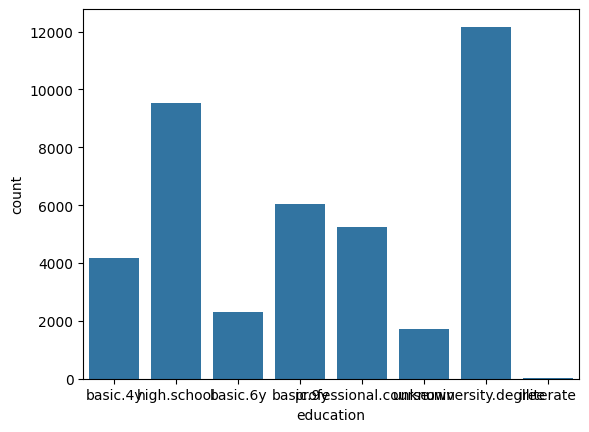

<Figure size 1500x1000 with 0 Axes>

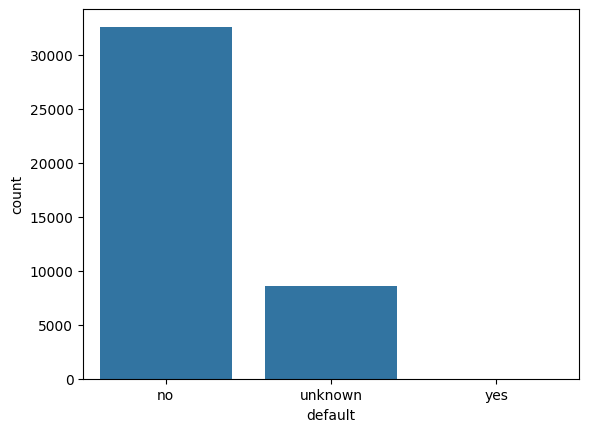

<Figure size 1500x1000 with 0 Axes>

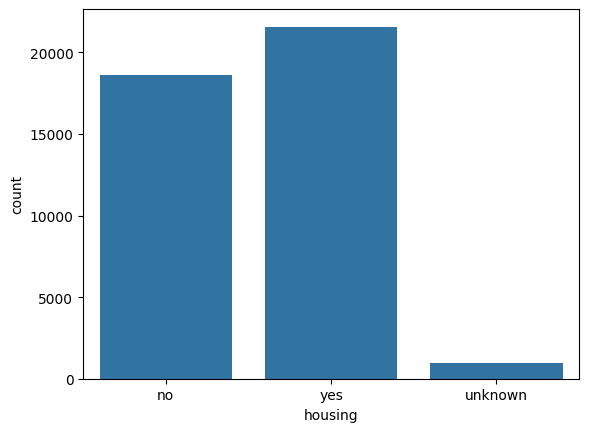

<Figure size 1500x1000 with 0 Axes>

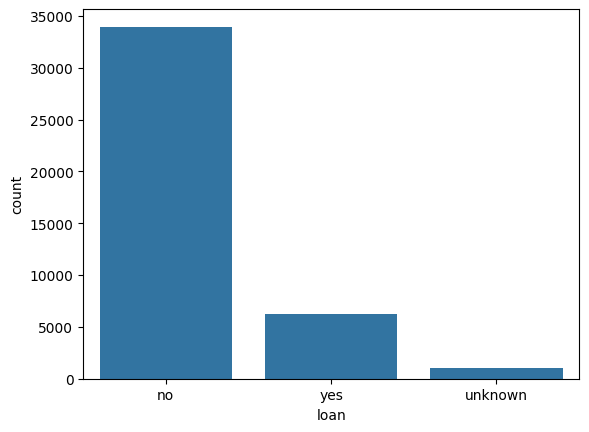

<Figure size 1500x1000 with 0 Axes>

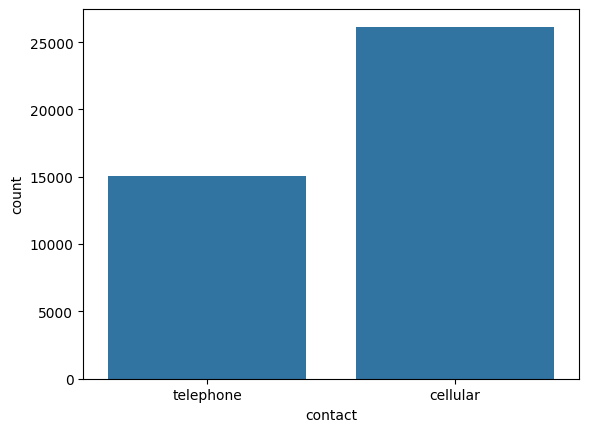

<Figure size 1500x1000 with 0 Axes>

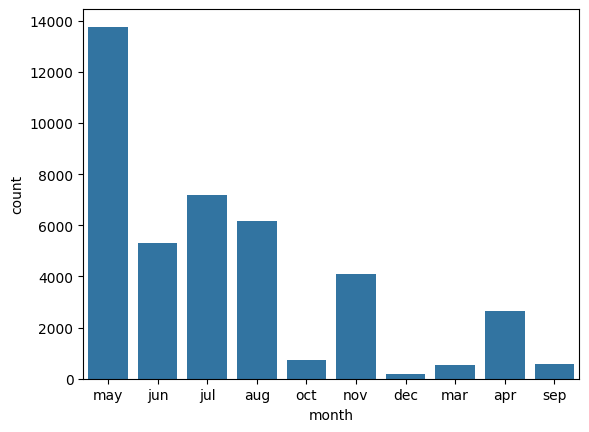

<Figure size 1500x1000 with 0 Axes>

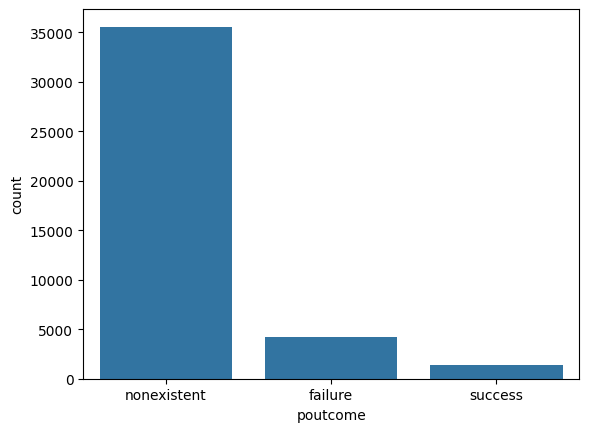

<Figure size 1500x1000 with 0 Axes>

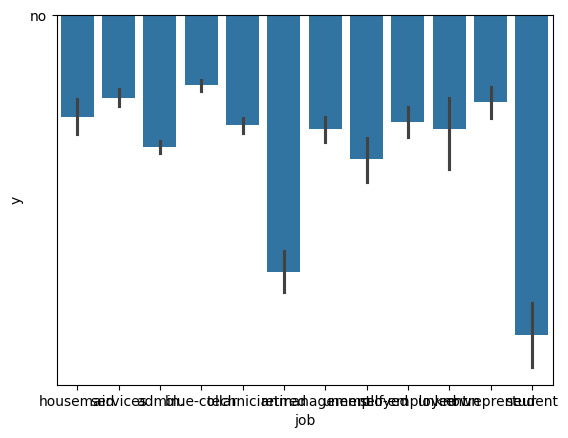

<Figure size 1500x1000 with 0 Axes>

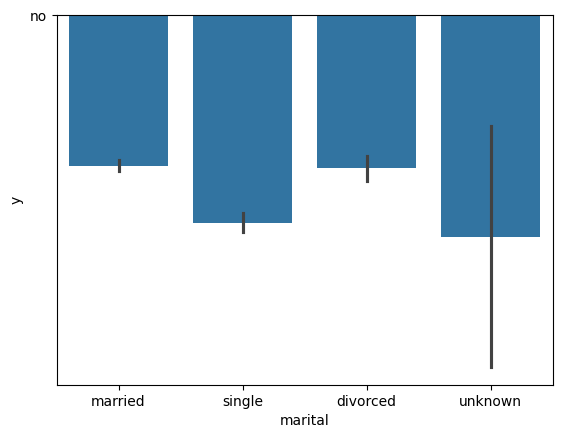

<Figure size 1500x1000 with 0 Axes>

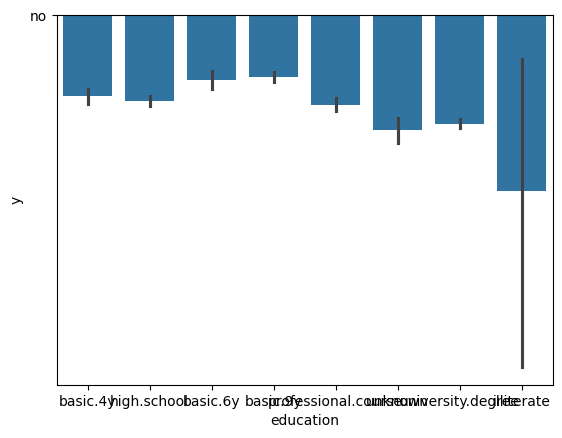

<Figure size 1500x1000 with 0 Axes>

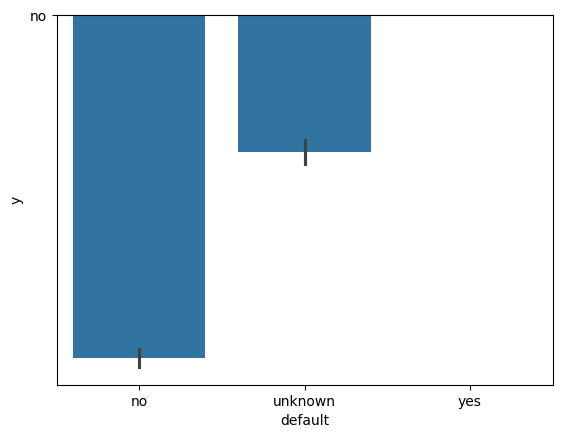

<Figure size 1500x1000 with 0 Axes>

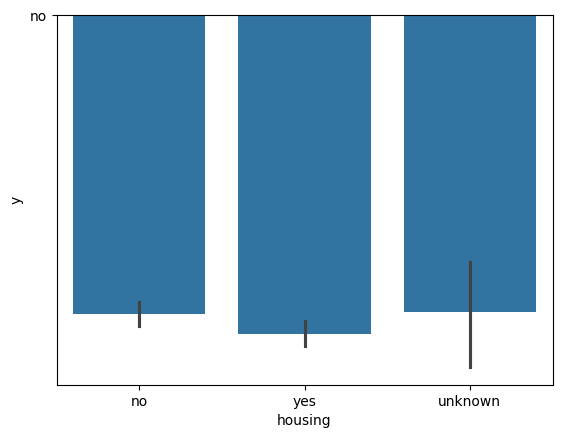

<Figure size 1500x1000 with 0 Axes>

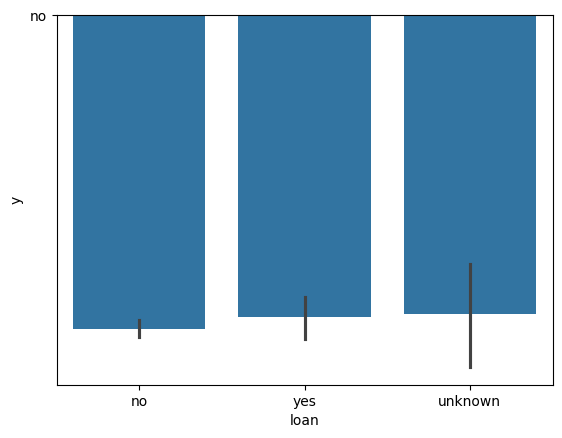

<Figure size 1500x1000 with 0 Axes>

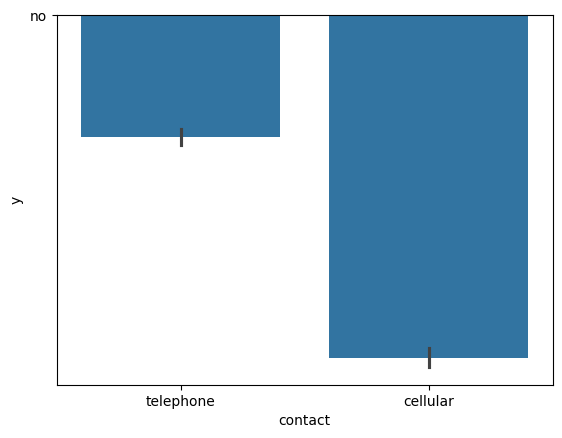

<Figure size 1500x1000 with 0 Axes>

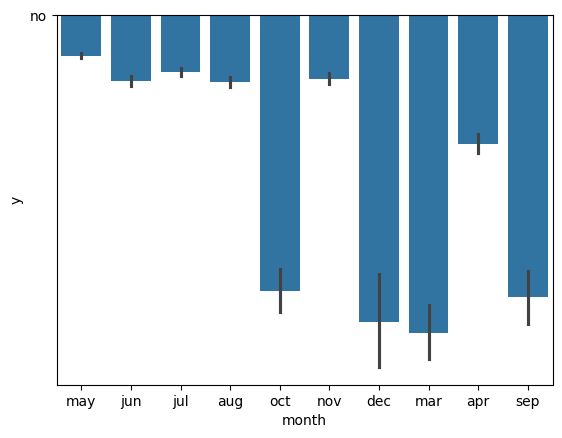

<Figure size 1500x1000 with 0 Axes>

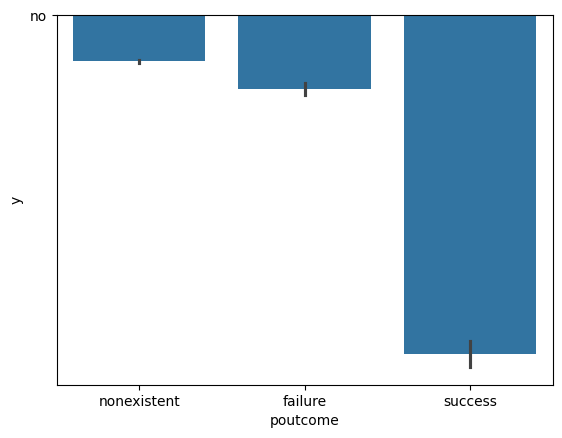

<Figure size 1500x1000 with 0 Axes>

<ipython-input-4-e4667a8676dd>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bank.corr(),annot=True)


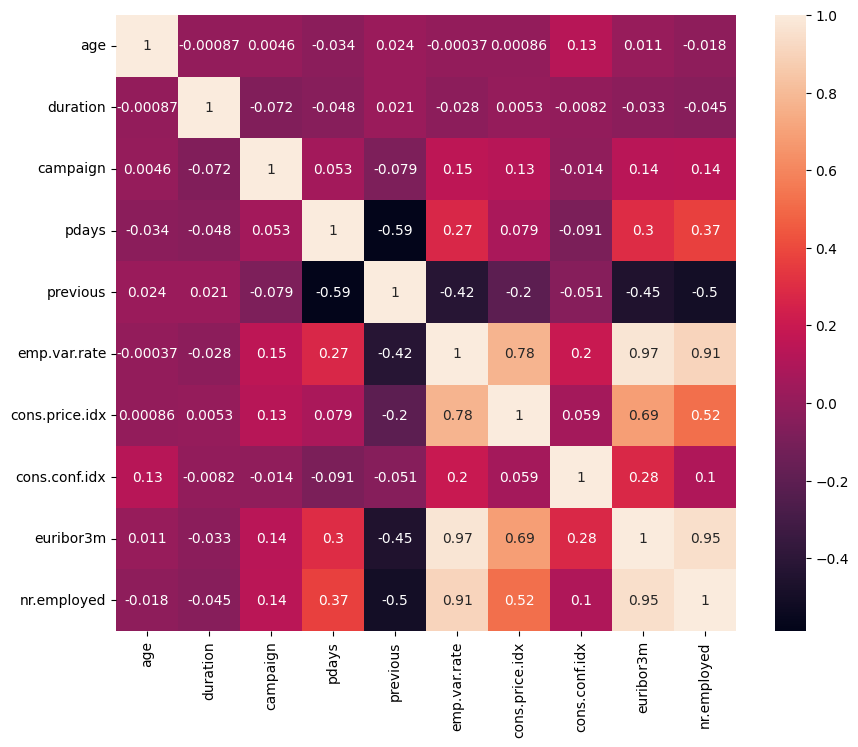

In [4]:
# **1. Check for missing values:**

bank.isnull().sum()

# **2. Analyze the distribution of categorical features:**

cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for col in cat_cols:
  sns.countplot(x=col, data=bank)
  plt.figure(figsize=(15,10))
  plt.show()

# **3. Analyze the relationship between categorical features and the target variable:**

for col in cat_cols:
  sns.barplot(x=col, y='y', data=bank)
  plt.figure(figsize=(15,10))
  plt.show()

# **4. Analyze the correlation between attributes:**

plt.figure(figsize=(10,8))
sns.heatmap(bank.corr(),annot=True)
plt.show()


2.Perform the following pre-processing tasks: 🡪10 marks
a. Missing Value Analysis
b. Label Encoding wherever required
c. Selecting important features based on Random Forest
d. Handling unbalanced data using SMOTE
e. Standardize the data using any one of the scalers provided by sklearn


In [ ]:
# a) Missing Value Analysis

# Check for missing values
missing_values = bank.isnull().sum()

# Drop columns with more than 50% missing values
bank = bank.dropna(axis=1, thresh=0.5)

# Impute missing values in remaining columns with the most frequent value
for col in bank.columns:
  if bank[col].isnull().any():
    bank[col] = bank[col].fillna(bank[col].mode()[0])


In [ ]:
# b) Label Encoding wherever required

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode categorical features
cat_cols = ['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','day_of_week','y']
for col in cat_cols:
  bank[col] = le.fit_transform(bank[col])


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
#  Random Forest and accuracy

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X = bank.drop('y', axis=1)
y = bank['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluate the accuracy of the classifier
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9166059723233795


In [ ]:
#c) Selecting important features based on Random Forest and print it

# Get the feature importances
importances = rf.feature_importances_

# Create a DataFrame with feature names and importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
features_df = features_df.sort_values('Importance', ascending=False)

# Print the top 10 most important features
print("Top 10 most important features:")
print(features_df.head(10))


Top 10 most important features:
          Feature  Importance
10       duration    0.314266
18      euribor3m    0.113133
0             age    0.091228
19    nr.employed    0.052400
1             job    0.049175
3       education    0.043315
11       campaign    0.042692
9     day_of_week    0.040790
12          pdays    0.032298
17  cons.conf.idx    0.030815


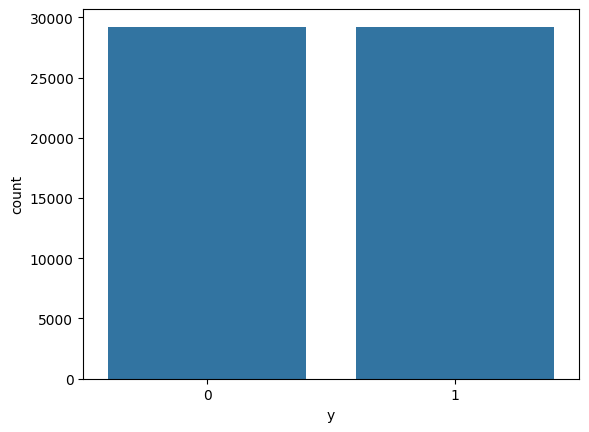

<Figure size 1500x1000 with 0 Axes>

In [ ]:
# d)Handling unbalanced data using SMOTE

from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Oversample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution of the target variable after oversampling
sns.countplot(x=y_train_resampled)
plt.figure(figsize=(15,10))
plt.show()


In [ ]:
# e)Standardize the data using any one of the scalers provided by sklearn


from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the training and testing data
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


Q.3. Build the following Supervised Learning models: 🡪5 marks
	a. Logistic Regression
	b. Decision Trees
	c. Random Forest


In [ ]:
#a) logistic regression

from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
lr = LogisticRegression()

# Train the model
lr.fit(X_train_scaled, y_train_resampled)

# Evaluate the model on the test set
y_pred = lr.predict(X_test_scaled)
accuracy_l = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_l)


Accuracy: 0.8682932750667638


In [ ]:
# b)decision tree

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train_scaled, y_train_resampled)

# Evaluate the model on the test set
y_pred = dt.predict(X_test_scaled)
accuracy_d = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_d)


Accuracy: 0.884316581694586


In [ ]:
# c)Random Forest

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train_scaled, y_train_resampled)

# Evaluate the model on the test set
y_pred = rf.predict(X_test_scaled)
accuracy_r = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_r)


Accuracy: 0.9085943190094683


Q.4. Tabulate the performance metrics of all the above models, perform tuning of models and tell which model performs better in predicting if the client will subscribe to term deposit or not 🡪10 marks

In [ ]:
# hyperparameter tunning for logistic Regression

from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
  'penalty': ['l1', 'l2'],
  'C': [0.001, 0.01]}
# Create a Logistic Regression model
lr = LogisticRegression()

# Create a GridSearchCV object
grid_search = GridSearchCV(lr, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train_scaled, y_train_resampled)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the best hyperparameters
print("Best hyperparameters:")
print(grid_search.best_params_)

# Based on the accuracy score and the best hyperparameters, we can conclude that the tuned Logistic Regression model performs better in predicting if the client will subscribe to term deposit or not.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Accuracy: 0.8655013352755523
Best hyperparameters:
{'C': 0.01, 'penalty': 'l2'}


In [ ]:
#hyperparameter tunning for decision tree

# Define the grid of hyperparameters to search
param_grid = {
  'max_depth': [None, 5, 10, 20, ],
  'min_samples_split': [2, 5, 10, 15],
  'min_samples_leaf': [1, 2, 4, 6]
}

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train_scaled, y_train_resampled)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the best hyperparameters
print("Best hyperparameters:")
print(grid_search.best_params_)

# Based on the accuracy score and the best hyperparameters, we can conclude that the tuned Decision Tree model performs better in predicting if the client will subscribe to term deposit or not.


Accuracy: 0.8851663025006069
Best hyperparameters:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# hyperparameter tunning for random forest

# Define the grid of hyperparameters to search
param_grid = {
  'n_estimators': [10, 5, 18, 20],
  'max_depth': [None, 5, 10, 20],
  'min_samples_split': [2, 5, 10, 15],
  'min_samples_leaf': [1, 2, 4, 6]
}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train_scaled, y_train_resampled)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the best hyperparameters
print("Best hyperparameters:")
print(grid_search.best_params_)

# Based on the accuracy score and the best hyperparameters, we can conclude that the tuned Random Forest model performs better in predicting if the client will subscribe to term deposit or not.


Accuracy: 0.9073804321437242
Best hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


In [ ]:
from tabulate import tabulate
data=[["RANDOM FOREST",accuracy_r],
      ["DECISION TREE",accuracy_d],
      ["LOGISTIC_REGRESSION",accuracy_l]]

col_names = ["Model", "Accuracy_Score"]
print(tabulate(data, headers=["MODEL","ACCURACY_SCORE"], tablefmt="fancy_grid"))

╒═════════════════════╤══════════════════╕
│ MODEL               │   ACCURACY_SCORE │
╞═════════════════════╪══════════════════╡
│ RANDOM FOREST       │         0.908594 │
├─────────────────────┼──────────────────┤
│ DECISION TREE       │         0.884317 │
├─────────────────────┼──────────────────┤
│ LOGISTIC_REGRESSION │         0.868293 │
╘═════════════════════╧══════════════════╛
